In [1]:
plt.style.use('bmh')
color = '#1240AB'

### Language exploration

In [2]:
df = pd.read_pickle('data/df.pkl')
print(df.shape)
df[:3]

(229824, 12)


,id,conversation_id,date,time,username,tweet,language,replies_count,retweets_count,likes_count,video_count,tweets_count
0,1583608299085500416,1583289720846618627,2022-10-22,02:56:55,mxyzptlk07,"@JakeGagain Get an $OCEAN bag, no matter how s...",en,0,0,4,0,1
1,1583607565543669761,1583607565543669761,2022-10-22,02:54:00,mxyzptlk07,Great! Let's go #datascientists💪 Do you have ...,en,0,0,0,0,1
2,1583603064044367872,1583603064044367872,2022-10-22,02:36:07,moonhodler2,"""The Energy Efficiency Data challenge is desig...",en,0,0,0,0,1


In [3]:
# language correction for bots
list_bots = '''dyorcryptobot
crypto3ot
abnormal_crypto
futuresheroes
ta4cryptobot
thepumpadvisor
acoindetective
denario_bot
signalsexp
cryptostatsbot
volumemonitor
cryptotrendin
true_botter
botusdt
botbtc1
nata79551571
runbibot
m4nth3d4n'''.split('\n')

df['language_new'] = df['language']
df.loc[df.username.isin(list_bots), 'language_new'] = 'robot'

In [4]:
# Preprocess text
def preprocess1(text):
    new_text = []
    for t in text.split(" "):
        t = '' if t.startswith('@') and len(t) > 1 else t
        t = '' if t.startswith('http') else t
        t = '&' if t == '&amp;' else t
        # t = '' if t.startswith('$') and not t[1].isdigit() else t
        t = '' if t.startswith('$') else t
        t = '' if t.startswith('#') else t
        new_text.append(t)
    return " ".join(new_text).strip()

def preprocess2(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        t = '&' if t == '&amp;' else t
        new_text.append(t)
    return " ".join(new_text)

df['tweet_txt'] = df['tweet'].map(preprocess1)
df['tweet_new'] = df['tweet'].map(preprocess2)
df['tweet_flg'] = df.tweet_txt != ''

In [5]:
# languages
df_lang = df.groupby('language').sum().iloc[:,2:].sort_values('tweets_count', ascending = False)
df_lang.T

language,en,qme,in,und,ro,es,tr,ja,pt,sv,qct,nl,tl,it,fr,da,cy,ca,ht,fi,no,de,ar,sl,pl,ru,eu,cs,et,fa,hu,zh,is,ko,vi,lt,th,el,hi,lv,uk,bg,mr
replies_count,202867,1473,1892,2117,1234,1374,5355,1137,595,388,133,2115,299,302,858,316,131,163,251,227,67,125,652,91,56,98,21,80,52,56,7,22,2,26,14,4,11,4,1,0,2,0,3
retweets_count,292068,2358,3747,3221,2502,1122,6291,962,503,507,763,1493,542,163,837,369,321,170,238,258,98,217,416,93,60,308,15,95,38,32,3,27,3,33,13,3,45,5,4,0,0,0,1
likes_count,1546577,20549,14490,26334,11385,8162,46119,4054,7674,4487,3683,6847,3819,1043,4215,3377,2040,2009,1723,1886,999,1083,2457,660,489,516,205,655,316,853,58,124,31,148,100,57,82,43,9,9,4,0,3
video_count,48453,1279,1452,959,444,1111,1122,234,120,117,0,240,119,606,200,110,44,46,75,83,74,55,124,40,34,35,7,25,20,22,1,12,6,16,10,4,2,0,6,1,2,0,1
tweets_count,187313,7299,6598,5883,3875,2740,2709,1611,1488,1156,1133,1003,867,829,824,808,554,513,413,391,303,244,241,199,163,103,100,96,90,45,38,30,30,30,26,24,23,13,8,6,3,1,1
tweet_flg,184805,3,5680,5562,3212,2433,2706,1611,674,642,22,715,557,722,803,532,280,282,231,252,236,218,241,100,87,103,40,68,80,45,21,30,18,30,26,9,23,13,8,2,3,1,1


In [6]:
# view tweets
for l in df_lang.index:
    print('----------')
    print(l)
    f1 = df.language == l
    f2 = df.tweet_txt != ''
    df11 = df[f1&f2]
    if len(df11) > 10:
        display(df11.tweet_new.sample(n = 10).values)
    else:
        display(df11.tweet_new.values)

----------
en


array(['@user For anyone looking to buy crypto, the big money will be made in ALT coins!  Do your own research and DD but here are some solid projects to look out for:  $HBAR $DOT $SKL $ADA $COTI $BAND $YFII $OCEAN $VET $UNCX $UTK $LINK $MANA  Just to name a few 💪🚀',
       '@user $ocean :( didn’t expect to see it at 37 cents. Got in early enough where still up but still kinda stings. HODL mode.',
       "@user Undoubtedly has to be $ALBT for me I'll be honest.  Their Liquidity Mining program with #BinanceSmartChain was the best way to end last year for me.  And the data tunnel with $OCEAN is close, can't wait. Also can't wait for their Tradfi integration this Q1. Big things ahead🚀🚀",
       'Its clear the $COTI army won this time!!.   Keep in charge to see the TA about $COTI 🚀🚀  $COTI $LUNA $VER $LTC $BTC $VET $DOGE $XRP $VRA $ENJ $OCEAN $RUNE $MIR $BAND $HTR $TEL $HTR  http',
       'The martkist faucet is easy to use Follow, Tweet or RT and solve captcha  http join us  http $eth $bt

----------
qme


array(['$Ocean  http via @user',
       '@user account is temporarily unavailable because it violates the Twitter Media Policy. Learn more.',
       '$Ocean #cryptocurrencies #Crypto   http via @user'], dtype=object)

----------
in


array(['You can buy martkist $Martk @user  http $eth $btc $link $xrp $om $ampl $yam $ocean $kai $mitx $tmpl',
       'You can buy martkist $Martk @user  http $eth $btc $link $xrp $om $ampl $yam $ocean $kai $mitx $tmpl',
       '$UNI back to $3.30.  SEE YAHH!  #Uniswap 🦄  $BTC $SPY $THETA $ENJ $ETH $FET $OCEAN $YFL $DOT $OM $YFV $UNI $LINK $BNB  $PEARL $WAVES $OMG $YFII $BAND',
       'Join our Martkist community forum now!  http $Martk #Martkist $eth $btc $link $xrp $om $ampl $yam $ocean $kai $mitx $tmpl',
       'You can buy martkist $Martk @user  http $eth $btc $link $xrp $om $ampl $yam $ocean $kai $mitx $tmpl',
       '$KEY 0.060 soon 💯 Mark this tweet 😇 . . . $BTC $ETH $DOT $LINK $XRP $SXP $BNT $YFI $DOT $CRV $KSM $EWT $OCEAN $AKRO $PCX $LTO $DOGE $BAT $ALGO $THETA  $FET $IOST $XVG $DGB $KNC $ICX $FTM $VET $COCOS $MFT $DOGE',
       '#alpha  You can join while its not too late  👇telegram👇  http  $alpha $lina $xvs $band $rune $trb $dia $ogn $btc $xrp $link $xtz $snx $ada $trx $bzrx 

----------
und


array(['@user $OCEAN 🙏',
       '@user @user @user @user @user @user @user $OCEAN !!!',
       '💥 $AAPX 💥  $RCHART $MITX $NIOX $ORAI  $OCEAN $RSR $GEO $NRCH $VRA $ZEE $TOTEM $TEM $TEL',
       '@user $EPAN ****** $OCEAN ?????', '@user @user @user $ocean 🍾🍾',
       '$OCEAN 🤏👀🌊', '$ocean ⛵😉🤝  http', '@user $Ocean 😉',
       '@user $OCEAN 🔥', '@user $OCEAN 💯  http'], dtype=object)

----------
ro


array(['Ocean Protocol 1-week activity:  Price: $0.28 +23%  http $ocean #oceanprotocol',
       '$chr ready for the take off  $sol $btc $eth $ltc $neo $ada $yfi $atom $comp $link $xlm $rlc $xrp $band  $ocean $enj $uni $aave $lsk $matic $iota $eos $rsr #xrp #crypto $mana $bal #xrpcommunity $eth $ltc $neo $ada $yfi $atom $comp #Bitcoin',
       'And so it begins 🚀🚀🚀 $KAI #staking #Bitcoin #defi #bnb #altszn $BAND $NEO $LINK $ETC $OCEAN $ZIL $MATIC @user $RSR $DOT $UNI $ROSE $NOIA $xlm $theta $vet $eth $fleta $xrp $ksm $grt $ltc $iotx $tomo $ftm $kava $trx $hbar $ada #Bullish @user #massadoption',
       '📉 Biggest Losers (1 hr) 📉 Numeraire $NMR -5.28% ❄️ THORChain $RUNE -3.36% ❄️ Storj $STORJ -2.87% ❄️ THETA $THETA -2.28% ❄️ Ocean Protocol $OCEAN -2.10% ❄️',
       '$OCEAN ✅  Increased 6.87% in 12.0 min(s) 💵 Price - 0.20370000 USDT ⏱️ [18 Oct] - 13:38:48 UTC #OCEAN #OCEANUSDT #CryptoBOT',
       '$OCEAN as of 2020-09-03 21:30 Name: Ocean Protocol Rank: 78 Type: token Market Cap: 152,343,

----------
es


array(['@user @user $OCEAN OR $THETA',
       '$OCEAN  No confirmo nada, otra que pierde un soporte clave.  Si tenemos una capitulación de precios y llega a 1450, es buena compra.   #criptomonedas #cripto #Bitcoin  http',
       'Mis precios para el pico máximo del ciclo alcista  $BTC 90.000$ - 120.000$ $ETH 8.000$ - 10.000$ $VRA 0,2$ - 0,5$ $HTR 10$ - 20$ $BOSON 10$ - 20$ $DOT 95$ - 120$  $ADA 3,5$ - 5$ $IOTA 4$- 5$ $VET 0,4$ - 0,5$ $KSM 700$ -1100$ $OCEAN 3$ - 5$ $LUNA 60$ -80$ Qué opináis?',
       "$SUPER 👀 🏆🐄 Farmer *🎶JONES' $PRO 👀ReaL 🐮 Estate 💰 $OCEAN 👀 Mark Cuban Likey ✔ $RADAR 👀DAPPs' 🖖",
       '$CKB $OCEAN $WAN 30m  Nuestras señales serán visibles en su cuenta de Tradingview. Al crear sus alertas, puede ser notificado por correo electrónico o SMS de las señales de compra o venta proporcionadas por nuestro algoritmo.  #Crypto #cryptotwitter  http',
       '$Ocean protocol 💯',
       '@user Pues $hbar como te dicen la llevo y agustote, si no $KDA y $ZIL, $OCEAN, $BOSON',
     

----------
tr


array(["Elinde $xrp olanlar ya da almayı düşünenler 2 Mart'ta paylaştığım gönderiye tekrar bir göz atsın. Yakında olası senaryomuz kendini göstermeye başlayabilir.   $lrc $utk $fet $reef $dock $rsr $ocean $ada $xrp $dag $klv $chz $tomo $eos $vra",
       '#ocen $ocean #bitcoin   #oceanusd soran arkadaşlar👇',
       '$ocean long işlem almak isteyen takip edebilir  http',
       '$ocean dikkatimi çeken bir coin oldu. Deutsche Bank ile işbirliği bulunuyor. Hacimi ve riayeti takibimde olacak 👍✅🐅 Sabahki $btc salınımına tepki vermeyen nadir coinlerden biri .  http',
       '🎯 $LTC | Formasyon kırılımının ardında fiyat hedefimize geldi. Faydalanan arkadaşları tebrik ederim. 🧿  $btc #binance $yfii $aave $link $ocean $dot $ada $kava $uni $eth $xrp $ltc $ont $sand $lrc $crv $btt $go $ogn  http',
       'Türk borsası tokeni #TUSHtoken ön satışta 25% bonus ve 1$ dan alım garantisi veriyor. CMC ilk 10 borsadan birinde listelenecek. #airdrop ta yapıyor @user $tush #Defi $tomo $noia $knc $sxp $bnt $

----------
ja


array(['◎取引量急増アラート（15分単位）◎(21時30分現在)  1位  $KMD/USDT  :  103.32倍 2位  $AKRO/USDT  :  43.47倍 3位  $POLY/USDT  :  14.95倍 4位  $STX/USDT  :  12.51倍 5位  $OCEAN/USDT  :  12.34倍',
       'ユニリーバとの提携を発表したOcean Protocolが目指すデータ市場とは by @user  #OceanProtocol $OCEAN #ブロックチェーン  http',
       '$OCEAN きてます。  画像は4時間足。 今朝の下落でもサポート割らなかった。強い。  抵抗のブレイクに挑戦中！  #仮想通貨 #アルトコイン  http',
       '◎2位\u3000$OCEAN/USDT◎ (左は取引量の増加倍率、右は取引量（1,000単位）を表す)  今\u3000回 ： 8.32倍,  406.6 K.USDT 前\u3000回 ： 1.48倍,  48.8 K.USDT 前々回 ： 0.4倍,  32.9 K.USDT ３回前 ： 1.28倍,  82.5 K.USDT ４回前 ： 0.67倍,  64.7 K.USDT',
       '$OCEAN オッチャン、こっからまた上げそうやね #Bittrex  http',
       'お世話になってます。 情報量が多すぎて資金足りませんw\u3000絞るのが難しい、、、 Binanceのみ使用です。  大きく乗れたのは下記です。1月からで確か4倍オーバーだったかと。 $DOT $STX $ATOM $KSM $RSR  細かいのは下記です。 $OCEAN $RUNE $NEAR $LOOM $CELR $ANKR  これからもよろしくお願いします。',
       '◎取引量急増アラート（15分単位）◎(22時現在)  1位  $BICO/USDT  :  5.04倍 2位  $DOGE/USDT  :  4.84倍 3位  $SUPER/USDT  :  2.84倍 4位  $OCEAN/USDT  :  2.48倍 5位  $MOVR/USDT  :  2.14倍',
       '◎取引量急増アラート（15分単位）◎(

----------
pt


array(['@user $HTR $OCEAN $RSR #readyforliftoff 🚀  http',
       '@user Add $ocean $rsr $enb', '@user $ocean & $rsr please',
       '@user @user $rsr and $ocean 🚀🚀🚀🚀',
       '@user @user @user @user @user @user @user @user @user $RSR $OCEAN millionaires pack',
       'No words.   @user  $STA $BTC $ETH $LINK $QNT $LCX $NOIA $XRP $ADA $UBT $COTI $RSR $XDB $OXT $ZIL $OCEAN',
       '$LINK to the ATH $OCEAN $LINK $RSR',
       '@user $rsr and $ocean mate for perfect combo.',
       '@user @user @user P for $POND R for $RSR O for $OCEAN',
       'Quem ai ainda não está aproveitando a onda $DeFi e ganhando uma boa grana? Se inscreva na @user e aproveitem:   http  $NEST (acabo de fazer +100%) $ORN $OCEAN $RING $KAI'],
      dtype=object)

----------
sv


array(['@user $FET + $OCEAN',
       '@user Lord Freaky Ocean of Little Caesar 👀 $ocean $klv',
       'Start buying   $VRA $HBAR $RSR $VET $OCEAN',
       '#KUCOIN you can invest in $OCEAN, $DAG, $ELA, $\u200b\u200bZIL, $VET, $FET, ........  http  ---------  #Crypto #cryptotrading #CryptoNews #CryptoTwitter #blockchain #trading #CryptocurrencyMarket #BTC #BTCUSD #BTCUSDT #DeFi #altcoins best',
       '@user @user @user @user @user @user @user @user $DAG and $OCEAN 😍😍',
       '@user $ocean and $DAG', '@user Gotta do $OCEAN fren',
       'First $ADA, then $DOT 🚀🚀  $OCEAN #ALTSEASON #Altseason2021 #Altcoins #Bitcoin #Polkadot $DOT $ADA $KSM $ALGO $REN $XTZ $SOL $AVAX',
       '@user $DOT & $OCEAN', '@user $OCEAN & $FET'], dtype=object)

----------
qct


array(['$OCEAN !', '$ocean...  .', '$OCEAN !!!!!!!!!!!!!!!!!', '$ocean …',
       '$OCEAN !', '$OCEAN !!!', '+ $OCEAN',
       '$eth $knc $dot $snx $rsr $zil $ocean :-)', '$ocean !',
       '!!!!!!!  $OCEAN'], dtype=object)

----------
nl


array(['Wow $OCEAN $CHZ $AUDIO You beauty’s!',
       '🌻#COTI partners met #Lovelace om mogelijke integraties zoals #ADA Pay en #Djed te onderzoeken.  ➡️Word nu lid van de #dagelijkse #crypto briefing! ➡️ http  #ETH #BTC $OCEAN #Solana #Decentraland #MANA $MANA #enjin #ENJ #WAX $WAX #SHIB #DOGE $COTI #crypto  http',
       'De #Crypto #Recap #Daily door @user van deze woensdag.  🥳Meld je nu aan en blijf #dagelijks op de hoogte!  ➡️ http  #BTC #ETH #DOGE #AVAX #cryptotrading #AXS $FET #IOTX #ADA #SOL #SUSHI #IOTA #TRON #Enjin #XRP #THETA #AVAX #OCEAN $OCEAN #Aavegotchi #SAND  http',
       '$ALBT 🌐 #API3 🔌 $DAG 🧅 $HBAR 🤝 $LINK ⛓ $OCEAN 🌊 $QNT 📱 $VXV 🤖 $XRP 🏦 $ZCX 🧘',
       '@user $ocean and $vgx 🙏🏽🙏🏽🙏🏽',
       'Ready for #bitcoin next move? 🚨🚨🚨  Premium signals & TA📊:  http  $btc $eth #ethereum $egld #elrond $xrp #xrp $flm $sushi $link #chainlink $vet #vechain $xlm #stellar $usdt #tether $btt $ada #cardano $trx $vidt $rsr $sxp #swipewallet  $vra $zil $etn $ocean  http',
       '@user 

----------
tl


array(['God $BLES 🙏  $KAI $TEL $ETH $BTC $WAN $ATOM $AION $DOT $THETA $LINK $DGCL $LABS $ICX $LUNA $SNX $VET $OCEAN $BSCPAD $BNB  http',
       '#CRYPTOCURRENCIES are MOVING! Try  http to scan for #altcoin and #deficoin movements.  #BTC #ETH $UMA $OCEAN $QNT $XLM $OKB $UNI $ZIL $LSK $RSR $XMR $THETA $CVT $ADA $XRP $MIOTA $LUNA $MKR $NANO  http',
       "win win win $LCX $TRB $CEL $OCEAN $KAI  what's next gang? 🤯  http",
       '@user @user $AKRO and $OCEAN', '@user @user $OCEAN tsunami',
       "Please #btc turn 50wma into support!  C'mon!  #altcoins  $dot $ksm $ada $eth $link $band  $uni $dia $trias $vidt $ring $kton $ocean $ring $pha $aca $pcx $kton #eth  http",
       'Check it out! $mitx $kai $tomo $link $fet $ocean $nuls $icx $neo $vet $geeq $ckb $eth',
       '$Ocean @user making waves in BigDATA 🌊',
       'Tsumani is coming $ocean', '$ocean babehhhh'], dtype=object)

----------
it


array(['#DataDeFi Loop -&gt;  Universal Data Income  Data -&gt; #Datatoken -&gt; $OCEAN -&gt; $BTC -&gt; $Tesla -&gt; Data....  http',
       '#OCEANUSDT Bull Alert!  30X Volume Price:      0.1658 5-min %: 1.1% Volume:  $189,454   #crypto #whale #btc #eth #OCEAN $OCEAN  http',
       '#OCEANUSDT Bull Alert!  15X Volume Price:      0.1556 5-min %: 0.58% Volume:  $106,422   #crypto #whale #btc #eth #OCEAN $OCEAN  http',
       '#OCEANUSDT Bull Alert!  5X Volume Price:      0.5 5-min %: 0.83% Volume:  $62,894   #crypto #whale #btc #eth #OCEAN $OCEAN  http',
       '#OCEANUSDT Bull Alert!  5X Volume Price:      0.1994 5-min %: 1.2% Volume:  $59,446   #crypto #whale #btc #eth #OCEAN $OCEAN  http',
       '#OCEANUSDT Bull Alert!  5X Volume Price:      0.2096 5-min %: 0.58% Volume:  $32,797   #crypto #whale #btc #eth #OCEAN $OCEAN  http',
       '@user @user $OCEAN mofo!',
       '#OCEANUSDT Bull Alert!  5X Volume Price:      0.213 5-min %: 0.094% Volume:  $79,225   #crypto #whale #btc #eth #

----------
fr


array(['@user @user @user @user C’est l’inverse il en sera propriétaire d’où l’intérêt $ocean',
       'Quel projet va augmenter le plus dans le prochain #altseason?  Retweet pour @user $ZIL  Like pour @user $OCEAN  http',
       "$OCEAN / @user ~ Daily 🐙  Je suis pas fan des charts contre le $BTC, comme celui de $ETH/BTC que l'on voit partout sur le CT en ce moment.  Pourtant, il faut avouer que le chart de $OCEAN me rappelle pourquoi j'en ai un si gros bag 😋  http",
       "Très joli retour de $OCEAN sur le devant de la scène mais s'affranchira t il de sa résistance ? Envoles toi petit océan !  http",
       '#Swash accumulation channel $OCEAN',
       "#crypto $OCEAN #OceanProtocol   Dans le triangle avec 1.3$ en support  C'est pas gégé et un rupture par le bas ne serait pas très étonnante. Si c'est le cas, on tomberait vers 1.19$, sous la mm50😟 ce qui serait encore moins gégé🤣  http",
       '$SHIB $ONE $OCEAN 10m  Nous avons 2 canaux de support : Discord, où nos abonnés nous posen

----------
da


array(['@user $FET & $OCEAN RN  http',
       '⚡ RSI ALERTS (1h) ⚡ ⏱ 02/11/2022 00:31 (UTC)  🟢  $LINK 29.93 🟢  $OCEAN 29.61   NFA   @user @user',
       '@user Me $ocean $vra $kai $dag $sntvt', '$OCEAN delivering👍👍',
       'TOP performing altcoins in the last hour (2/2):   $OCEAN -&gt;  0.12%   $RVN -&gt;  0%   $RVN -&gt;  0%   $RVN -&gt;  0%   $RVN -&gt;  0%    #crypto #altcoin #defi #NFT',
       'Send it 🚀🚀🚀 P.s #buy #btc    $link $rsr $rsv $trb $dot  $eth #defi $yfi #nft $ocean $aave',
       '@user @user Hold $ocean & $vidt',
       'True                                                              P.s #buy #btc    $link $rsr $rsv $trb $dot  $eth #defi $yfi #nft  $vidt $ocean $badger $aave',
       '@user $ocean $vidt ✅🤝',
       '$rsr $ramp $ocean $vet $egld $reef $algo $utk $base $eth $link $ksm $ftm $dot $pols Altseason is here.......  http'],
      dtype=object)

----------
cy


array(['$EWT $OCEAN $COTI 👀', '$EWT + $OCEAN + $TSLA',
       '@user $OCEAN $EWT 🌊⚡️   http', '@user $OCEAN & $EWT',
       '@user $HTR $VRA $OCEAN $DIA $EWT 👌', '@user $CHR, $OCEAN & $EWT',
       '@user $eGLD & $Ocean 🤔',
       '@user ⚔ @user @user @user $DOT $OCEAN $EWT',
       '@user $OCEAN $EWT ⚡️', '@user $edgl, $ocean & $ewt 🙃'],
      dtype=object)

----------
ca


array(['Last #Signal Results      $XLM    5.09% $LIT    36.13% $OCEAN    67.67% $CVX    1.25% $CHZ    5.97% #IOTA    27.48% #ZIL    40.85% #LIT    99.88% #OGN    34.61% #XRP    57.20%    All Details on Bio Total Profit  376.14%',
       '📉 Biggest Losers (1 hr) 📉 Digitex Futures $DGTX -6.09% ❄️ IRISnet $IRIS -1.99% ❄️ Molecular Future $MOF -1.51% ❄️ Ocean Protocol $OCEAN -1.21% ❄️ Nimiq $NIM -1.16% ❄️',
       '$Ocean està llest per aparèixer per començar a volar 🚀  http',
       'Trending  $WBTC 24h vol. $195,348,708 1D 🟢0.27% 7D 🔴5.75%  $SAND 24h vol. $606,605,970 1D 🔴0.48% 7D 🔴11.69%  $AVAX 24h vol. $845,353,072 1D 🟢4.17% 7D 🟢0.70%  $ALPHA 24h vol. $7,813,731 1D 🟢2.07% 7D 🔴6.13%  $OCEAN 24h vol. $34,539,006 1D 🟢3.76% 7D 🔴3.68%',
       '@user @user $LUNA & $OCEAN & $FET',
       '📈 Biggest Gainers (1 hr) 📈 Prometeus $PROM 5.66% 🔥🔥 Axie Infinity $AXS 4.83% 🔥🔥 Voyager Token $VGX 2.12% 🔥 Ocean Protocol $OCEAN 1.76% 🔥 Perpetual Protocol $PERP 1.55% 🔥',
       '1. #SelfKey $key 2. #Viber

----------
ht


array(['@user $CHZ, $PYR, $EGLD, $OCEAN, $FET, $TRAC, $ROSE, $NEAR, $UOS, $MNW, $BOSON, $SAND si altele',
       '$NERDz is a sleeping giant.  Only $4M market cap.    $ROSE $RBASE $RFI $TCORE $DOT $KSM $OCEAN $TRX $ETH $BTC $PRQ $KTON $VRA $LCX $COTI',
       '@user Merry XMAS, Navy bro. 2022 $OCEAN = 🚀 🌊',
       '#Polkadot Ecosystem projects by Mcap: $RWS 4.3 M $KEN 3.9 M $MIX 4.9 M $KTON 8.4 M $OAX 10 M $XRT 15,5 M $DOCK 15 M $XOR 32 M $KLP 32 M $RING 39 M $OM 45 M $CELR 45 M $PCX 56 M $AKRO 62 M $EDG 108 M $OCEAN 169 M $KSM 311 M $EWT 582 M $DOT 5.49 B #cryptocurrencies #crypto #Bitcoin',
       '@user $zil $ocean $fet and $dot', '20h left. Vote! $ocean. ☝️😉',
       'TOP 10 COINS BY LUNARCRUSH ALTRANK  $MOOV $GALA $OCEAN $XCAD $UNFI $PINU $MTL $POLY $CTSI $ADA  http',
       'bye $ocean  http',
       '$mrph will be a multi billion dollar Mc this cycle $KAI $QNT $VVT $MRPH $GEEQ $XRT $PHA $MPH $ROOK $VET $TRAC $AMB $ICX $NEO $NULS $DIA $ORAI $TRB $DOT $XRP $ROOK $POOLZ $OCEAN $RSR

----------
fi


array(['Kardiachain $kai 👀  👀 #ビットコイン #비트코인 #比特币 #bitcoin\xa0 #crypto $eth $btc $link $ada $vet $tomo $icx $ewt $qnt $ubt $utk $zil $xrp $ocean $rsr',
       '$OCEAN 1941 aldık 3341 görmüş.  2 haftada ⌚   %70 kâr 🚀🚀🔥🔥  $xrp $eth $bnb $btc $xlm $ada $dash $dot $eos $link $ltc $neo $trx $xtz $rvn $vet $matic $doge $dot $uni $xem $matic $link $bat $stx $chz $sol $blz $sushi $enj $coti $avax $algo $srm $sxp $atom $ftm $theta $coti',
       '$OCEAN $ALBT $UOS $VXV &lt;3',
       '#altszn 🔥 $eth $link $dot $snx $ksm $ocean $yfi $uni $wozx $icx $vet $egld $grt  http',
       'When #altseason? $SPI $BONDLY $UDOO $TVK $OCEAN $PRQ',
       '$link $hbar $ada  $vet #ankr $dgb $kai  $xrp $algo $xrp $ava $eth $ltc $ocean  #xlm #dot #atom #utk #ava #trx $nwc #aergo $doge $eth $enj $chz $chr $waxp $akro $ankr  $dego and $bepro will moon together 🚀🚀🚀🚀.  Similar chart. #defi #nft',
       '@user $SXP & $OCEAN',
       '@user 25% $KAI 25% $Ocean 25% $ICX 25% $ALGO',
       'When Sensei talk, I listen $CA

----------
no


array(['📡 🤬 Signal for $OCEAN/USDT on #Binance Sell volume: +167.0K USDT Price: -18.23% (0.74390000 USDT) Last 1h: bought 217.6K USDT, sold 429.6K USDT Last 24h: bought 19.89M USDT, sold 22.22M USDT Last 7d: bought 86.58M USDT, sold 93.74M USDT  http',
       '💎 $DAG  Hello $egld $ocean $coti $utk $orn',
       '📡 🤑 Signal for $OCEAN/USDT on #Binance Buy volume: +275.3K USDT Price: +0.19% (0.90740000 USDT) Last 1h: bought 474.8K USDT, sold 468.8K USDT Last 24h: bought 4.48M USDT, sold 4.52M USDT Last 7d: bought 48.18M USDT, sold 47.86M USDT  http',
       'Still selling low? 😂😂 Sellers rekt! 😉✅ $ocean #alts #altcoins  http',
       '$NOIA 💥👀💥  $DAG $OCEAN $BQX  http',
       '📡 🤑 Signal for $OCEAN/USDT on #Binance Buy volume: +138.2K USDT Price: +4.22% (0.54870000 USDT) Last 1h: bought 407.3K USDT, sold 271.0K USDT Last 24h: bought 6.80M USDT, sold 6.57M USDT Last 7d: bought 19.10M USDT, sold 19.07M USDT  http',
       '🚨 Trend Alert  Bullish Kumo Twist Detected 🟩☁🔀 4h Chart #Binance $

----------
de


array(['📢 LEGEND--DD-- AAAARY  🔥 $DMST 🔥  http #Revolutionary #BLOCKCHAIN #Gaming company!!  $SHROOM $REVV $VIB $ABYSS $RARI $PGT $SLP $LAYER $CHADS $GEM $ETHV $ROPE $COIN $SEEN $ARTE $MCX $GSWAP $BONK $WAIF $ZOMB $ZUT $YFI $YFLINK $Vidya $Rune $ocean $index $shr',
       'Top 5 🚀 1-hour gainers on the #VoyagerApp: $CKB $VGX $DGB $ICX $OCEAN  #cryptocurrency  http',
       '@user @user @user Also wenn die Deutsche Bundesbank mit $ocean zusammenarbeitet . Da können wir nix falsch machen 😄',
       'Anstiege bei #Gate_io in den letzten 15 Min. (vgl. mit $USDT):  1. $MER [+25.21%: 0.014080000 -&gt; 0.017630000] 2. $OCEAN [+20.37%: 0.162320000 -&gt; 0.195390000] 3. $AIR [+11.16%: 0.009248000 -&gt; 0.010280000]   http',
       '🔥Digital Asset Regulatory Bill Passes Senate Committee 7-0.  $VET $ADA $DGB $XRP $XLM $KNC $CVC $LINK $ETH $VTHO $OCEAN $SC $LTC $ZIL #BTC #Crypto #DeFi #Blockchain #VeFam   http',
       '#altseason #altcoins about to rocket with this one $bolt $btc $bepro $zil $lin

----------
ar


array(['@user @user @user $ocean ماراح تتكلموا عنها؟',
       'حال أسعار #العملات_المشفرة 💯 Top خلال الـ 24 ساعة الماضية  ⬆️ 21% صعدت 🔹 معدل : 4.97% 🔹 التداول: 2.26 مليار دولار 🔹 الأكثر : Ocean Protocol $OCEAN 24.8521%  🔻 79% هبطت 🔸 معدل : -3.67% 🔸 التداول: 95.82 مليار دولار 🔸 الأكثر : HedgeTrade $HEDG -9.30249%  http',
       '@user هل عندك من عملة $ocean سمعت الكثير عنها واظن انها جديدة نوعا ما',
       'تحديث $ocean اخترق المقاومه والان طبيعي يختبر المقاومه 🚬   انا قاعد اشوف هدف دولار انت شنو تشوف 🚬  http',
       'الشراء بعد الاختراق  $ocean  http',
       'ضربة سريعة  $ocean  وقف الخسارة سلاحك  http',
       'اليوم دخلت  $CRV  و زودت كمية $Ocean   بانتظار الانطلاقة ⏳',
       'ماشي بالملي 🚬🐝 $ocean  http', '@user شو رأيك بعملة $ocean',
       'شوف الاقلاع ياعمده 🤑  $ocean  @user  http'], dtype=object)

----------
sl


array(['$FET 😎🚀🌕  @user #Tesla   $doge $Shiba $ada $xrp $xlm $dot $sol $tomo $ocean $vet $one $luna',
       '⭕️ Premium Lambo 3 WEEK Trades RESULT -  $ICX           - 490% (5x lev) $ZRX          - 475% (5x lev) $QTUM       - 468% (5x lev) $CRV          - 324% (5x lev) $OCEAN    - 324% $SOL          - 245.5% (5x lev) $STPT       - 177% (5x lev)  Join Telegram :  http',
       '🤓🤓 $coti $vra $btc $eth $link $ada $vet $ocean $dag $tomo  http',
       '#Cryptocurrency Hot in Futures  $FTM 🟡🟡🟡🟡🟡 $1.50 $MANA 🟡🟡🟡🟡🟡 $3.62 $OCEAN 🟡🟡🟡🟡🟡 $0.87 $STORJ 🟡🟡🟡🟡🟡 $1.68 $SXP 🟡🟡🟡🟡🟡 $1.57   http',
       '$ETH 🧩  $LRC $OMG 🏃🏽\u200d♂️💨  $ALGO $XLM $ADA $VET $OCEAN $DOT 💵💴💶💷  $CELO 📲',
       '$icx to $2 soon   $fil $sxp $akro $trx $coti $ocean $luna $xlm $rune $reef $fet',
       '$OCEAN, $METIS, $INJ, $UTK., $VRA 🔥',
       '@user 1. $Theta 2. $Enj 3. $One 4. $Ocean 5. $Lym 6. $Vra 7. $TFuel 8. $Chz 9. $Luna 10. $Ada',
       '$fet 🤯  $sxp $doge $aave $dot $xrp $ocean $shibu $vra $ltc $btc $tomo $pond $on

----------
pl


array(['@user Wbu $ocean ?', '😎😎😎😎 $OCEAN to two  Totwototwototwo',
       'Which one will go 100x? $Ocean $Akro $Tel $NPSX #crypto #oceanex #akropolis #telcoin #npsx',
       'hmm  $OCEAN  http', '@user Wen $ocean szn',
       '@user $ocean $dot $bico $kilt $ada 🖤',
       '@user @user @user @user @user @user @user $LGCY $USDL $OCEAN and $ROWAN',
       'TOP-10 #POLKADOT $DOT ECOSYSTEM PROJECTS BY #FDMC  $DOT $LINK $GLMR $KSM $COMP $ANKR $EFI $ZRX $ANKR $OCEAN  http',
       '😂 zzz...ZZZ 😴   $KP3R #KP3R $VOXFI $CORE $OCEAN',
       'Niiice 💪 $Ksm - $ocean'], dtype=object)

----------
ru


array(['По дата-сету ANIANG-84 "Google Search Data" доходность в $OCEAN примерно 70% за последние 10 часов. 👀 Снижается по мере наполнения пула  http',
       '@user Скорее как liquidity pool в Uniswap. Комиссии за покупку дата-сетов, которые платятся покупателями в $Ocean, распределяются пропорционально между участниками пула. То есть нет покупок - нет прибыли.',
       '@user У меня много чего лежит с февраля-марта 2020 $noia $ubt $ocean',
       'За последние полгода #binance залистил множество монеток из моего портфеля: $OCEAN $COTI $VIDT $TRB $YFII - и это здорово. Но для полного счастья не хватает листингов $NOIA и $UBT.',
       '@user Походу $ocean на coinbase залистят. Позавчера со всех бирж дофига перевели на какой то кошелек:)',
       '⚡️ТОП-15 монет по @user Galaxy Score  Galaxy Score - это собственная оценка,которая постоянно сравнивает криптовалюту с самими собой с учетом метрик сообщества,собранных со всего Интернета.  $BNB $GRT $OCEAN $CRV $CAKE $EASY $ALGO $ENJ $LINA 

----------
eu


array(['Buy on dip อนาคต $TVK $CERE $OCEAN $ANKR 🌛',
       '@user $NEX $OCEAN & $NOIA 🌚', '@user $vgx or $ocean',
       '@user $NOIA / $OCEAN',
       'EU--&gt;GaiaX--&gt;@oceanprotocol --&gt; $Ocean--&gt;🚀🌜🪐',
       '@user 1. $AGI 2. $ERG 3. $OCEAN', '@user $gala, $ocean ? 😁',
       '$BAL 🤜🤛 $OCEAN', '@user @user 1.  $VGX   2.  $ocean   3. $algo',
       '@user 3/7... not bad + $FET $NOIA $OCEAN $ORAI'], dtype=object)

----------
cs


array(['New Bitcoin Investment  $LINK $MANA $FET $TOMO $VIDT  $ZEC $ZRX $OCEAN $TEL $VRA $FTM $ANKR $MATIC $ATOM $KAVA $ZIL $BNB $AMC $NOK $GMA   http',
       '$CKB ➕99% $BCD ➕99% $SXP ➕99% $DGB ➕99% $GOLD ➕99% $TOMO ➕99% $ZEN ➕99% $GT ➕99% $OCEAN ➕99% $WRX ➕99% #cryptocurrency  http',
       '@user 50% HODL 50% into $OCEAN', '👌Hodl $ocean #oceanbtc  http',
       '$OCEAN HODL #FA  http',
       'Rate my portfolio 1 to 10..  $tomo, $vra, $ocean, $xdb, $ont , $utk, $coti, $soul  #altcoin  http',
       'HODL $OCEAN until 2030-2040',
       'Target  target 1.5-2$ @user #ocean $ocean Что   скажешь? @user  http',
       '$OCEAN  hodl bag. (SL: 0.25)  http',
       'DATA $OCEAN @user $MDT @user $SWASH @user $KYVE @user 19/25'],
      dtype=object)

----------
et


array(['$SUN is RIPPINGGG!!!!! 😁👨\u200d🚀🏄🏽\u200d♂️😎🌞🌞  $TRON  DYOR though!! 🕵️\u200d♂️  #Justswap  $BTC $ETH $FET $VIDT $LTC $OCEAN $BNSD $SUSHI $YFL $DOT $OM $YFV $SWFL $KSM $LINK $BNSD $BNB $DGB $XVG $DAG $COTI $ADA $VET $PEARL $WAVES $OMG  http',
       'Very hot! $agi #SingularityNet   2021 use case soon!  $btc $agi $ocean $fet $vet $xrp $rsr $ada $dot $dia $eth #cryptocurrency #Bitcoin',
       'Trending  $RUNE 24h vol. $4,837 1D 🟢3.57% 7D 🔴8.94%  $OMG 24h vol. $262,974,211 1D 🟢6.54% 7D 🔴6.04%  $OCEAN 24h vol. $34,539,006 1D 🟢3.76% 7D 🔴3.68%  $WBTC 24h vol. $195,348,708 1D 🟢0.27% 7D 🔴5.75%  $ADA 24h vol. $875,497,785 1D 🟢2.03% 7D 🔴6.19%',
       '$BUY IS A BUY!  $KAI $TEL $ETH $BTC $WAN $ATOM $AION $DOT $THETA $LINK $AUDIO $ICX $LUNA $OCEAN $BNB $BSCPAD $DRGN $TRX $NEO $ZNN $EOS',
       '$XLM zamanı geldi gibi.  $ada $akro $gvt $req $xtz $matic $egld $uni $coti $avax $doge $sxp $aave $theta $eth $vidt $btc $reef $ksm $xem $rvn $xlm $xrp $zec $sushi $lit $paid $trx $bnb $link $iot

----------
fa


array(['@user از صرافی بایننس ممکنه تو این شرایط بازار که همه توجه ها به سمت اکوسیستم بایننس هست خیلی رشد نکنه ولی من $ocean رو بلند مدت hodl میکنم',
       'فکر کنم برای امروز هم دیگه بسه. تو این مارکت -وقتی راه بیفته- اینقدر فرصت معاملاتی هست که نمیدونی کدوم رو بگیری. همچین مواقعی بهتره روی تعداد محدودی تمرکز کرد و بقیه رو گذاشت برای بقیه... 😉  چارت های امروز: $AUDIO  $ATOM  $AVAX  $BAND  $ICX  $OCEAN',
       'پر ریسکه ولی خوب تریدریمو باید ترید کنیم. $ocean  http',
       '@user حواست به $ocean باشه 👀',
       'میخریم میخریم . از کف مارکت میخریم :) #OCEAN $OCEAN #ocean $ocean  http',
       '$OCEAN پتانسیل این رو داره از همین جا دویست درصد سود بده. البته اهالی فن بهتر میتونن نظر بدن #کریپتو',
       'اوشن دوباره گل کاشت و ATH جدید بهمون داد 😆🌙🚀 $OCEAN  http',
       'خلاصه ای از رویدادهای هفتگی #کوینکس 4 تا 10 ژانویه 2021  #استخدام سفیر #CoinEx  #لیستینگ های جدید: $OCEAN و $SKL  تغییر استفاده از #CET به عنوان #کارمزد معاملات   http',
       'صرافی @user امروز توکن @user $OCEAN را د

----------
hu


array(['Trending  $STORJ 24h vol. $77,595,182 1D 🟢8.08% 7D 🔴3.30%  $OCEAN 24h vol. $34,539,006 1D 🟢3.76% 7D 🔴3.68%  $DODO 24h vol. $35,329,997 1D 🟢7.55% 7D 🔴9.88%  $SOL 24h vol. $1,099,010,495 1D 🟢0.85% 7D 🔴10.75%  $XRP 24h vol. $1,140,240,661 1D 🟢0.27% 7D 🔴7.25%',
       '@user $PHR $TRX  $OCEAN  🚀🚀',
       'Trending  $OCEAN 24h vol. $34,539,006 1D 🟢3.76% 7D 🔴3.68%  $DUSK 24h vol. $42,505,595 1D 🔴5.83% 7D 🟢27.84%  $WAVES 24h vol. $76,519,295 1D 🟢2.58% 7D 🔴3.23%  $DOGE 24h vol. $368,813,097 1D 🟢1.41% 7D 🔴7.24%  $XTZ 24h vol. $192,436,859 1D 🟢1.25% 7D 🔴3.21%',
       'Trending  $ADA 24h vol. $875,497,785 1D 🟢2.03% 7D 🔴6.19%  $REN 24h vol. $48,656,971 1D 🟢4.34% 7D 🔴12.80%  $DOT 24h vol. $1,097,586,058 1D 🟢6.82% 7D 🔴4.18%  $OCEAN 24h vol. $34,539,006 1D 🟢3.76% 7D 🔴3.68%  $SOL 24h vol. $1,099,010,495 1D 🟢0.85% 7D 🔴10.75%',
       '@user $HTR $OCEAN $LINK $VET = 💰',
       'Trending  $TRX 24h vol. $1,182,587,748 1D 🟢1.65% 7D 🔴3.63%  $DOGE 24h vol. $368,813,097 1D 🟢1.41% 7D 🔴7.24%  $SOL 24h

----------
zh


array(['1.今日圖說: Crypto $OCEAN 壓力線近期衝了六次過關，是個右側進場點位。  http',
       '完全稀释市值低于 5 亿美元的顶级项目 2022 年 7 月 1 日 $ROSE $BICO $FITFI $XCAD $KAVA $ASTR $ANKR $JST $DEXE $OCEAN $ONE $DAR $ALICE $KNC $ATLAS',
       '$EOS-高涨幅：Layer1，较早期公链项目 $OCEAN-高涨幅：Ocean Protocol，数据经济相关的生态体系 $ETC-高振幅：ETH Classic，ETH硬分叉 #公链 #POW  http',
       '全球推特大V精选评级 7.30 1 $XRP @user 2 $OCEAN @user 3 $QNT @user 4 $SKL @user 5 $ARPA @user 6 $STARL @user 7 $TLM @user 8 $DIA @user 9 $ROSE @user 10 $WOO @user  http',
       ' http  @user   還在挖 $BDP 的這裡有個 ”小工具“  *合約沒有審計*  $ETH $BTC $USDT $USDC $OCEAN $LINK $SUSHI $UNI $YFI $AAVE $SRM $TOMOE',
       '全球推特大V精选评级 8.2 1 $PRXY @user 2 $OCEAN @user 3 $FTT @user 4 $RSR @user 5 $FTM @user 6 $LINA @user 7 $TLM @user 8 $ALBT @user 9 $WOO @user 10 $UFO @user  http',
       '3.2) H2O(@H2O_data)：一种数据支持的稳定资产，具有受管理的浮动制度。第一个场景以 $OCEAN 和数据代币为抵押的非锚定稳定资产，用作 Ocean 数据市场的原生货币。后续支持更多数据市场。 预计Q2中旬推出，确定空投给 $OCEAN 和 $NEWO 持有人',
       '@user 生日快乐 $OCEAN 繁荣 🎂🥳🥂🎉🎆🚀🚀🚀  http',
       '[Cointelegraph新闻] Polygo

----------
is


array(['🚨 BULLISH ENGULFING ALERTS - (15m)  ⏱️01/27/2022 23:16     $YFI  $BLZ  $OCEAN  $AVAX  $FLM   NFA',
       'Next leg up will be wild! 🐃 $DOT @user $OCEAN @user $DAG @user $RSR @user $ATOM @user $CRV $YFI @user #Crypto #DeFi #Bitcoin  http',
       '⚡ EMA8/EMA21 CROSSOVER ALERTS (1h) ⚡ ⏱ 02/14/2022 23:01 (UTC)  📈 $COMP 📈 $YFI 📈 $OCEAN   NFA   @user  http',
       '⚡ RSI ALERTS (1h) ⚡ ⏱ 02/11/2022 21:58 (UTC)  🟢  $XLM 29.73 🟢  $YFI 29.85 🟢  $OCEAN 29.16   NFA   @user',
       '🚨 BULLISH ENGULFING CANDLE ALERTS - (15m)  ⏱️01/31/2022 07:15 (UTC)  📈 $DENT 📈 $MANA 📈 $YFI 📈 $OCEAN 📈 $EGLD   NFA',
       '#Cryptocurrency Rising Stars  $NEO 🟡🟡🟡🟡🟡 $38.06 $KSM 🟢🟢🟢🟢🟢 $391.40 $SUSHI 🟡🟡🟡🟡🟡 $8.05 $YFI 🟢🟢🟢🟢🟢 $30,056.67 $OCEAN 🟢🟢🟢🟢🟢 $1.36   http',
       '🚨 RSI ALERTS (15m) 🚨 ⏱️01/31/2022 04:32 (UTC)  🟢  $YFI 29.17 🟢  $BLZ 27.86 🟢  $OCEAN 28.43 🟢  $UNI 29.79 🟢  $ALICE 28.57   NFA',
       '🚨 RSI ALERTS (15m) 🚨 ⏱️01/30/2022 21:28 (UTC)  🟢  $COMP 29.49 🟢  $YFI 27.65 🟢  $BLZ 27.60 🟢  $OCEAN 27.70 🟢

----------
ko


array(['TOP-15 성장 잠재력이 있는 1억 7500만 달러에서 2억 2500만 달러 사이의 시가총액 프로젝트!  $ALPHA $TOMO #C98 $KLV $BAND $PROM $INJ $RLC $OCEAN $UBT $STMX $REEF $CHR $IOTX $RAY  http',
       '추가 하락이 가능하다 생각되기에 여전히 현금 비중 50프로 이상 유지중. 이번 숏이익금으로만 매수함. 추가 하락을 준다면 현물 BTC 매수 시작할예정. 벤처 포트폴리오는 이미 포화상태.. $KDA $OCEAN $API3 $METIS 는 추가 조정이 온다면 좀 더 담을 예정',
       '$OCEAN $0.27 까지 한번 달려봅시다.  1. 오션 물량이 참 가뭄이었는데 시원시원하게 들어오는 중 2. 자잘자잘한 매물대 그냥 먹으면서 올라오는 중. 가즈아!  http',
       '$OCEAN $NEWO $H2O $PSDN  Web3 데이터 이코노미를 위한 최초의 논-페깅 스테이블 에셋, H2O가 런칭되었습니다.   http  http',
       '@user 소개 @user 내에서 데이터 거래 및 파밍을 진행할 때 문제점은 $OCEAN 토큰을 사용할 때 가격 변동성이었습니다. 이러한 문제점을 해결하고자 @user  프로젝트는 모든 변동성을 제거합니다.',
       'KardiaChain CFO, Anthony Vo @user 작성한 #staking의 가치에 대한이 훌륭한 보고서를 읽어보십시오. $kai    Link:  http  $rvx $core $zrx $rlc $bqx $ftt $nmr $btc $eth $link $ocean $ada $zil $theta $xrp $ogn $omg $ont $icx $tomo $bat $enj $based $dia $trb $rsr',
       '$OCEAN $NEWO $FLX  H2O 에어드랍 디테일  총 공급량의 4%가 뉴 오더 스테이커에게 할당. 뉴 오더 에어드랍은 4개의 트랜치로 출시되며 각 트랜치에

----------
vi


array(['Hãy xem màn thể hiện của các dự án trong hệ sinh thái #Polkadot hàng tuần trên #KuCoin  Top 5 coin tăng mạnh nhất ⬇️ $KSM +53.09% $DOT +24.21% $AKRO +16.37% $DOCK +12.74% $OCEAN +4.92%  🚀 Giao dịch ngay:  http  http',
       'Hãy xem màn thể hiện của các dự án trong hệ sinh thái #Polkadot hàng tuần trên #KuCoin!  Thay đổi giá 7 ngày: $ZRX +60.46%  $OCEAN +37.27%  $EWT +11.49%  $KSM +8.14%  $DOCK +6.91%   🚀 Giao dịch ngay:  http  http',
       '@user ليش $ocean = ١.٧٢  !!',
       'Hãy xem màn thể hiện của các dự án trong hệ sinh thái #Polkadot hàng tuần trên #KuCoin!  Thay đổi giá 7 ngày: $AKRO +143.18% 📈 $OCEAN +57.87% 📈 $ANKR +30.76% 📈 $KSM +18.17% 📈 $ZRX +4.80% 📈  🚀 Giao dịch ngay:  http  http',
       'الهدف 2 ☑   #ocean $ocean  #btc $btc  http',
       'Cùng xem thay đổi các dự án thuộc hệ sinh thái #Polkadot trên #KuCoin!  Thay đổi giá 7 ngày qua $AKRO -7.57% 📉 $OCEAN -13.00% 📉 $ZRX -13.79% 📉 $KSM -16.72% 📉 $ANKR -24.28% 📉  🤔 Đã tới lúc mua đáy? 🚀 Giao dịch ngay:  http  h

----------
lt


array(['My portfolio💪🏼 $KAI $BAND $OCEAN $UOS  http',
       '@user $ocean $dvg $vai 🚀✅',
       'Para mi gente #latina #latino $Kai @user #puertorico  #pr #spain $XDB $LINK $VET $XRP $KAI $BAND $OGN #Bitcoin #Ethereum #crypto $xlm $dcr $doge $lcx $coti $ocean $orn $chr $eth',
       '$akro $kai $ocean are pure gems!',
       'So, are you prepared? #altszn #defi $sxp $ampl $utk $coti $tomo $lcx $iota $link $uos $fet $rune $rsr $ocean $chr $kai $dag  http',
       '@user Here’s mine: $DIVI $CHSB $OCEAN $TOMO $ADA $RPD $VET $LINK $ALGO $LTO',
       '$ocean $coti $kai 💵💵💵💵💵💵',
       '$lcx 🔥  $btc $eth $rsr $dag $ocean $link $lcx $kai $xio $ubt $vra $theta',
       '$lcx grooowing 🚀  $btc $eth $rsr $dag $ocean $link $lcx $kai $xio $ubt $vra $theta'],
      dtype=object)

----------
th


array(['ส่องหุ้นมหาชนชาวทวิตเตอร์วันนี้  $BBIK - แบบนี้เรียกว่าอะไรนะ $BWG - เละ  $BYD - เละ $NEX - ปิดโดดไป 19 ได้ไง $NUSA - กลับมาซ่าอีกแล้ว $OCEAN - เละ $PSTC - เละ  เจ้าหาเงินเที่ยวปีใหม่ ?',
       '@user $ocean ซื้อตอนราคาถูกมาเยอะ  ตอนนี้ขึ้นมาจนเกือบเท่าทุนแล้ววว 😍😍',
       '$Ocean แรงดี ลงน้อย มีโอกาสขึ้นไป 0.3230 รับ 0.2117  http',
       '@user น่าจะรอโปรเจ็คเสร็จ  แต่ดูมันบ่อยๆแล้วง่วงมาก $ocean 🥱🥱',
       '@user จัดไป 300k ค่ะ เช้านี้ $ocean',
       '@user คุณแฟงคะ วันนี้ $ocean จะมีประกาศเกี่ยวกับ V4 น่าเข้าไว้ไหมคะ คุณแฟงมองตัวนี้ว่ายังไงคะ 🥺🙏',
       '@user $BTC $LUNA $BNB $GALA $OCEAN  จริงมีอีกแต่หลักๆก็ประมาณนี้คับบบ  #aunlock101',
       '@user มีเหรียญนึงที่กำลังจะ bull อย่างแข็งแกร่ง $ocean',
       'เหรียญนอกสายตาของใครหลายๆคน ฉันก็ยังชอบมันอยู่ดี  $OCEAN 🌊',
       '$Ocean ให้กันได้ไหม 37 ก็ได้ 40 ก็ได้ 36 ก็ได้เอาหมด มาเถอะ'],
      dtype=object)

----------
el


array(['Άρθρο Τι σημαίνει ο Κανονισμός για την Τεχνητή Νοημοσύνη (AI) για τη Silicon Valley:  http  @user #OceanProtocol $OCEAN #κρυπτονομίσματα #κρυπτο #οικονομια #Ελλάδα #Greece #Greek #crypto #cryptocurrency',
       'Έλα να δούμε άσπρη μέρα.. $ocean',
       'Άρθρο Ενημέρωση Πρωτοκόλλου Ocean || 2022:  http  @user #OceanProtocol $OCEAN #κρυπτονομίσματα #κρυπτο #οικονομια #Ελλάδα #Greece #Greek #crypto #cryptocurrency',
       'Άρθρο Το σταθερό περιουσιακό στοιχείο H2O που υποστηρίζεται από το $OCEAN εγκαινιάζεται από το New Order μαζί με το Reflexer Labs:  http  @user #OceanProtocol $OCEAN #κρυπτονομίσματα #κρυπτο #οικονομια #Ελλάδα #Greece #Greek #crypto #cryptocurrency',
       'Άρθρο Ρυθμιζόμενα χαρακτηριστικά απορρήτου: τώρα διαθέσιμα στο Ocean Market  http  @user #OceanProtocol $OCEAN #κρυπτονομίσματα #κρυπτο #οικονομια #Ελλάδα #Greece #Greek #crypto #cryptocurrency',
       'Θα αρχίσουν να πιστεύουν και οι πιο δύσπιστοι. Είμαστε στην αρχή μιας μεγάλης αλλαγής. #BTC #ETH $LINK

----------
hi


array(['@user $ocean dekho bhai',
       '@user bhai aapne galti s $sand k chart k place p $sol ka chart share kr diya....BTW $MANA and $OCEAN ka bhi send kr dena',
       '🔥 #KuCoin पर #Polkadot इकोसिस्टम प्रोजेक्ट साप्ताहिक परफॉर्मेंस देखें  टॉप 5 साप्ताहिक गेनर्स ⬇️ $KSM +53.09% $DOT +24.21% $AKRO +16.37% $DOCK +12.74% $OCEAN +4.92%  🚀 चलतेफिरते ट्रेड करें:  http  http',
       '#KuCoin पर #Polkadot इकोसिस्टम साप्ताहिक परफॉर्मेंस की जाँच करें!  7 दिन कीमत परिवर्तन: $ZRX +60.46%  $OCEAN +37.27%  $EWT +11.49%  $KSM +8.14%  $DOCK +6.91%   🚀चलते फिरते ट्रेड करें:  http  http',
       '#KuCoin पर #Polkadot इकोसिस्टम प्रोजेक्ट साप्ताहिक परफॉर्मेंस देखें!  7 दिन कीमत परिवर्तन: $ANKR +59.77% 📈 $OCEAN +27.81% 📈 $AKRO +24.58% 📈 $ZRX +19.01% 📈 $DOCK +16.41% 📈  🚀 चलते फिरते ट्रेड करें:  http  http',
       '#KuCoin पर #Polkadot इकोसिस्टम प्रोजेक्ट साप्ताहिक प्रदर्शन देखें  7 दिन कीमत परिवर्तन: $AKRO +143.18% 📈 $OCEAN +57.87% 📈 $ANKR +30.76% 📈 $KSM +18.17% 📈 $ZRX +4.80% 📈  🚀 चलते-फिरते ट्रेड करे

----------
lv


array(['lets go !!!! $fet $coti $rsr $ocean $ren $mir $sxp $ltc $cudos @user',
       'Told you $VI 👌  $BTC $ALTS $OCEAN $KAI $SXP $ALGO $OMG $CHR $AKRO $RSR $WAVES $DAI $DOT $BOLT $DeFi  http'],
      dtype=object)

----------
uk


array(['Монета дня по социальной активности -  Ocean protocol  $OCEAN  19 апреля 2022 г.  http',
       'Монета дня по социальной активности -  Ocean protocol  $OCEAN  19 апреля 2022 г.  http',
       '@user Он у меня в приложении блокфолио, так что если только вручную переписывать. Сейчас в основном портфеле 22 монеты, 17% $UBT, остальное от 7 до 0.5%: $noia $band $lit  $dag $ocean $zil $coti $pylnt $edi $trb $vidt $tfd $icx $frm $chr $algo $vra $wabi $hpb и по мелочи...'],
      dtype=object)

----------
bg


array(['@user Цетус @user  ·   9 сентября $Cetus на #Arbitrum  ♟️Взаимодействие здесь  http :    Ранние участники получат вознаграждение 🪂  $OCEAN  $ETH  $LIQD  $lqETH #  Арбитраж'],
      dtype=object)

----------
mr


array(['साप्ताहिक गेनर्स द्वारा #KuCoin पर टॉप #Web3 प्रोजेक्ट्स (28 मार्च, 2022)  🔥 $FIL  🔥 $CERE  🔥 $ICP  🔥 $CUDOS  🔥 $OCEAN   #KuCoinTrendingCoins  http'],
      dtype=object)

In [7]:
# df.groupby('language')['tweet_flg'].sum()

In [8]:
# languages to translate
list_lang = '''tr
es
pt
nl
fr
ja
it
ar
de
pl
ru
fa
ko
zh
th
vi
el
hi
uk
mr
bg'''.split('\n')
print(list_lang)

['tr', 'es', 'pt', 'nl', 'fr', 'ja', 'it', 'ar', 'de', 'pl', 'ru', 'fa', 'ko', 'zh', 'th', 'vi', 'el', 'hi', 'uk', 'mr', 'bg']


In [9]:
df.loc[df.language.isin(list_lang), 'language_new'] = 'other'

In [10]:
df.loc[~df.language_new.isin(['en','other','robot']), 'language_new'] = 'en_new'

In [11]:
df.language_new.value_counts(normalize = True)

en       0.76
en_new   0.13
robot    0.06
other    0.05
Name: language_new, dtype: float64

### Transformers using

In [12]:
filt = df.language_new.isin(['en','en_new'])

list_ids  = list(df[filt]['id'])[:]
list_text = list(df[filt].tweet_new)[:]

print(len(list_text))

203547


In [13]:
from transformers import pipeline

# MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
MODEL = "ProsusAI/finbert"

model_clf = pipeline("sentiment-analysis", model=MODEL)

Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [14]:
t1 = dt.now()
list_out = model_clf(list_text, return_all_scores = False)
print(dt.now() - t1)

5:52:51.498309


In [23]:
pd.set_option('display.max_colwidth', 500)

df_out = pd.DataFrame(list_out)
# df_out['txt'] = list_text
df_out['id']  = list_ids

df_out['score1'] = df_out.label.map({'neutral':0,'positive':1,'negative':-1})
df_out['score2'] = df_out.score1 * df_out.score

df_out.to_pickle('data/df_sentiment.pkl')

print(df_out.shape)
df_out[:5]

(203547, 5)


,label,score,id,score1,score2
0,neutral,0.76,1583608299085500416,0,0.00
1,neutral,0.58,1583607565543669761,0,0.00
2,neutral,0.69,1583603064044367872,0,0.00
3,neutral,0.72,1583598008511664128,0,0.00
4,neutral,0.69,1583595987851173888,0,0.00


In [24]:
df_out.score1.value_counts()

 0    186722
 1     12605
-1      4220
Name: score1, dtype: int64

### Wordclouds

In [36]:
df1 = df.merge(df_out)
print(df1.shape)

(203547, 20)


In [58]:
df_tags = pd.read_pickle('data/df_tags.pkl')
print(df_tags.shape)
df_tags[:3]

(2044201, 3)


,id,val,feat
0,1583608299085500416,oceanprotocol,mentions
1,1583603064044367872,oceanprotocol,mentions
2,1583595987851173888,emoney_com,mentions


In [62]:
df2 = df_tags[df_tags.feat == 'hashtags'].groupby('id')['val'].agg(lambda x: ' '.join(x)).reset_index()
print(df2.shape)
df2 = df2.merge(df_out)
print(df2.shape)
df2[:3]

(76179, 2)
(62594, 6)


,id,val,label,score,score1,score2
0,1212144173790322688,ct,neutral,0.76,0,0.00
1,1212167919993597953,dip,neutral,0.80,0,0.00
2,1212207385768595456,bittrex kucoin bitcoin arbitrage arbitraj arbingtool,neutral,0.94,0,0.00


#### words

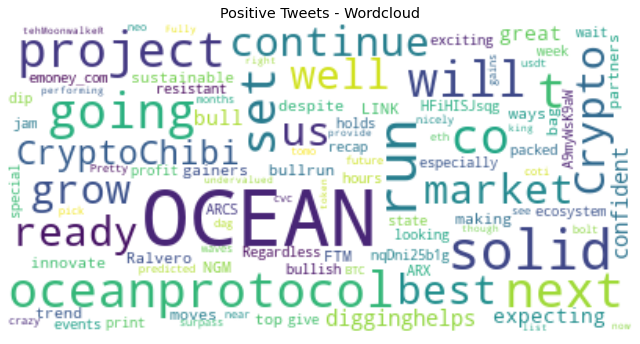

In [55]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
 
stop_words = ["https"] + list(STOPWORDS)

# Wordcloud with positive tweets
df_wc = df1['tweet'][df1["label"] == 'positive']

wc = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(df_wc))
plt.figure(figsize = (10,10))
plt.title("Positive Tweets - Wordcloud")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

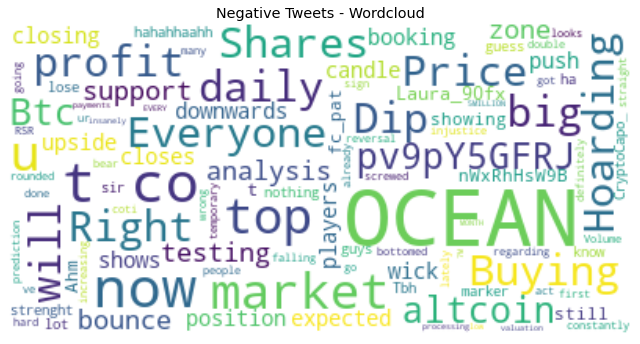

In [56]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
 
stop_words = ["https"] + list(STOPWORDS)

# Wordcloud with positive tweets
df_wc = df1['tweet'][df1["label"] == 'negative']

wc = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(df_wc))
plt.figure(figsize = (10,10))
plt.title("Negative Tweets - Wordcloud")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

#### tags

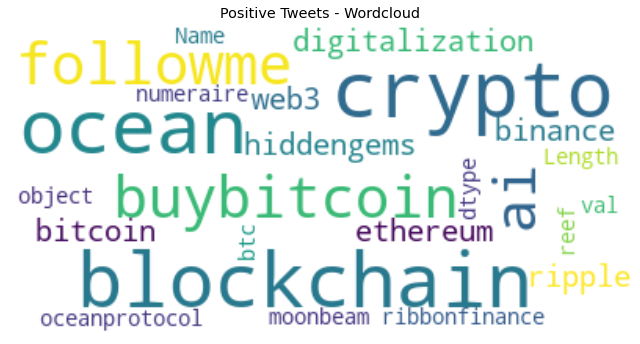

In [75]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
 
stop_words = ["https"] + list(STOPWORDS)

# Wordcloud with positive tweets
df_wc = df2['val'][df2["label"] == 'positive']

wc = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(df_wc))
plt.figure(figsize = (10,10))
plt.title("Positive Tweets - Wordcloud")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

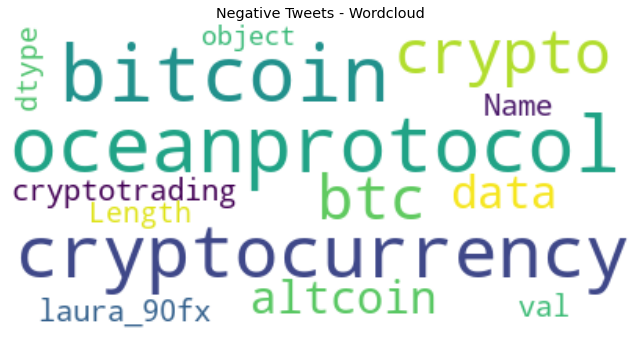

In [80]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
 
stop_words = ["https"] + list(STOPWORDS)

# Wordcloud with positive tweets
df_wc = df2['val'][df2["label"] == 'negative']

wc = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(df_wc))
plt.figure(figsize = (10,10))
plt.title("Negative Tweets - Wordcloud")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

### Correlations

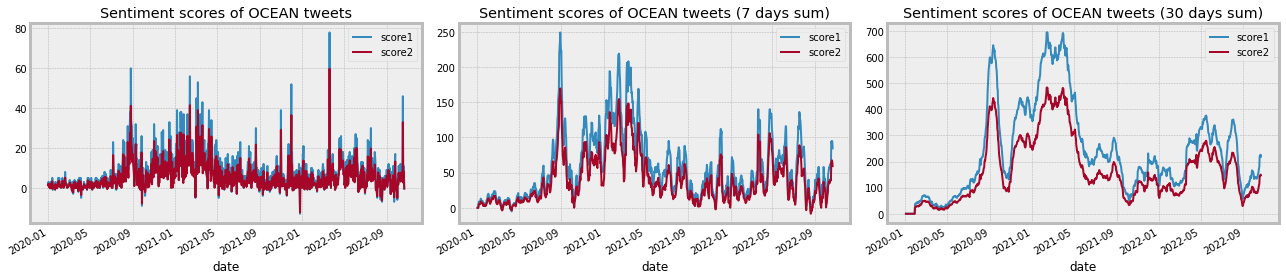

In [174]:
_, ax = plt.subplots(1,3, figsize = (18,4))

df_scores = df1.groupby('date').sum().iloc[:,-2:]
_ = df_scores.plot(ax = ax[0], title = 'Sentiment scores of OCEAN tweets')

df_scores = df1.groupby('date').sum().iloc[:,-2:].rolling(7).sum()
df_scores.fillna(0, inplace = True)
_ = df_scores.plot(ax = ax[1], title = 'Sentiment scores of OCEAN tweets (7 days sum)')

df_scores = df1.groupby('date').sum().iloc[:,-2:].rolling(30).sum()
df_scores.fillna(0, inplace = True)
_ = df_scores.plot(ax = ax[2], title = 'Sentiment scores of OCEAN tweets (30 days sum)')
plt.tight_layout()

In [181]:
df_price = pd.read_pickle('data/df_price.pkl')

df0 = df.groupby('date').sum().iloc[:,2:]
df0['users_count'] = df.groupby('date')['username'].nunique()
df0['Close'] = df_price.Close * 100

df_scores = df1.groupby('date').sum().iloc[:,-2:].rolling(30).sum()
df_scores.fillna(0, inplace = True)

df0 = pd.concat([df0, df_scores], axis = 1)

del df0['tweet_flg']
del df0['video_count']
df0

,replies_count,retweets_count,likes_count,tweets_count,users_count,Close,score1,score2
date,,,,,,,,
2020-01-01,65,67,357,32,21,3.92,0.00,0.00
2020-01-02,48,46,304,55,34,3.48,0.00,0.00
2020-01-03,35,49,282,36,24,3.67,0.00,0.00
2020-01-04,13,58,266,29,17,3.59,0.00,0.00
2020-01-05,11,9,80,20,15,3.31,0.00,0.00
...,...,...,...,...,...,...,...,...
2022-10-18,1351,486,5050,640,280,16.80,219.00,142.06
2022-10-19,346,241,1658,298,180,16.48,224.00,145.41
2022-10-20,177,122,962,244,137,16.55,224.00,147.41


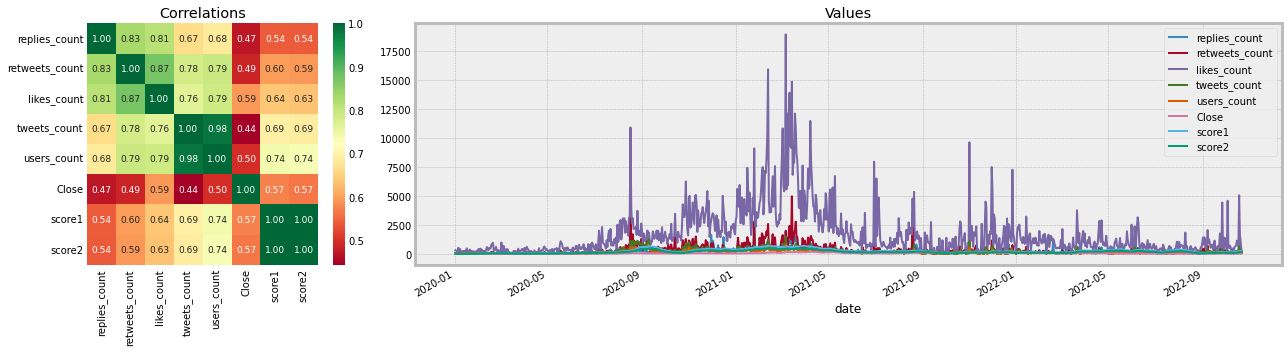

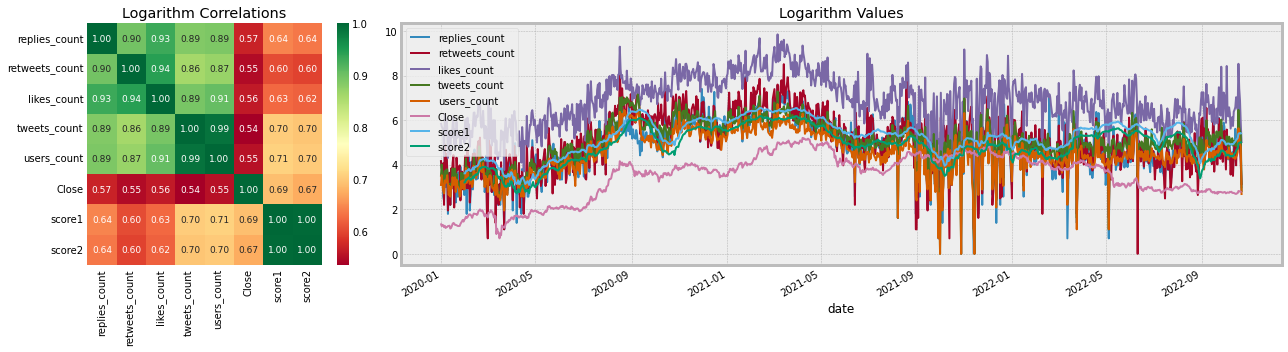

In [182]:
_, ax = plt.subplots(1,2, figsize = (18,5), width_ratios=[1, 3])
_ = sns.heatmap(df0.corr(), ax = ax[0], cmap = 'RdYlGn', annot = True, fmt = '.2f', annot_kws={"size": 9})
_ = ax[0].set_title('Correlations')
_ = df0.plot(ax = ax[1], title = 'Values')
plt.tight_layout()

_, ax = plt.subplots(1,2, figsize = (18,5), width_ratios=[1, 3])
_ = sns.heatmap(df0.apply(np.log).corr(), ax = ax[0], cmap = 'RdYlGn', annot = True, fmt = '.2f', annot_kws={"size": 9})
_ = ax[0].set_title('Logarithm Correlations')
_ = df0.apply(np.log).plot(ax = ax[1], title = 'Logarithm Values')
plt.tight_layout()

### Usernames sentiments